<h1>Проверка временного ряда на стационарность при помощи теста Дики-Фуллера</h1>

In [24]:
import matplotlib.pyplot as plt
import math
import matplotlib as mpl
import statsmodels.api as sm
import numpy as np
import pandas as pd
import statsmodels.tsa.stattools as ts

plt.style.use("bmh")
plt.rcParams['figure.figsize'] = (10, 3)

In [25]:
xl = pd.ExcelFile("/Users/nikolaygut/Desktop/Silver.xlsx")
df = xl.parse("Sheet1")
df.head()

,Data
0,Silver
1,26.28
2,26.36
3,26.17
4,25.99


In [26]:
data = pd.DataFrame(df[df['Data'].isnull() == False]['Data'])[1:]
name = pd.DataFrame(df[df['Data'].isnull() == False]['Data'])[:1]['Data'][0]
print(name)
data

Silver


,Data
1,26.28
2,26.36
3,26.17
4,25.99
5,25.915
...,...
473,19.625
474,19.14
475,19.47
476,20.57


<h3>Выведем временной ряд в виде графика.</h3>

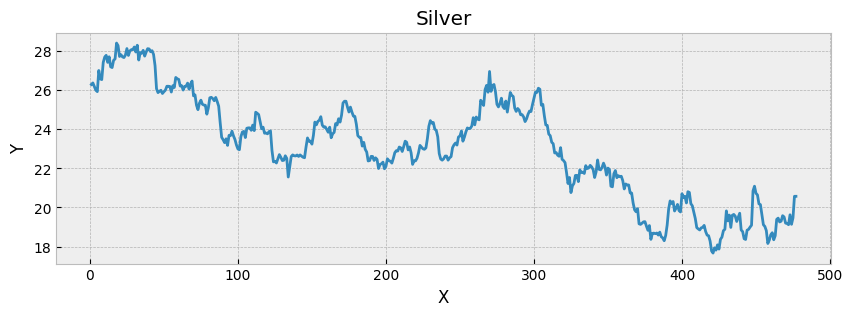

In [27]:
plt.plot(data.index, data);

plt.ylabel("Y")
plt.xlabel("X")
plt.title(name)

plt.show()

<h3>Максимальный лаг вычислим формулой N^(1/3).</h3>

In [28]:
maxlag = math.floor(math.pow(len(data), (1/3)))

In [29]:
maxlag

7

<h3>Проведем тест Дики Фуллера для константы и квадратичного тренда включенных в регрессию.</h3>

In [30]:
[t,p,c,r] = ts.adfuller(data, maxlag=maxlag, regression='ctt', autolag='t-stat', store=True, regresults=False)
print(r.resols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.922
Date:                Sun, 18 Feb 2024   Prob (F-statistic):             0.0643
Time:                        13:08:34   Log-Likelihood:                -170.76
No. Observations:                 472   AIC:                             357.5
Df Residuals:                     464   BIC:                             390.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0336      0.011     -2.932      0.0

<h3>Проведя Тест Дики Фуллера для константы и квадратичного тренда включенных в регрессию, видно, что значение P-value больше 0.05, не отличается значимо от нуля, результаты теста Дики Фуллера не рассматриваем.</h3>

<h3>Проведем тест Дики Фуллера для константы и линейного тренда включенных в регрессию.</h3>

In [31]:
[t,p,c,r] = ts.adfuller(data, maxlag=maxlag, regression='ct', autolag='t-stat', store=True, regresults=False)
print(r.resols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     2.237
Date:                Sun, 18 Feb 2024   Prob (F-statistic):             0.0386
Time:                        13:08:40   Log-Likelihood:                -170.79
No. Observations:                 472   AIC:                             355.6
Df Residuals:                     465   BIC:                             384.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0340      0.011     -3.002      0.0

<h3>Проведя Тест Дики Фуллера для константы и линейного тренда включенных в регрессию мы получили значение P-value для коэффициента линейного тренда меньше 0.05. Таким образом, коэффициент значимый. Рассмотрим результаты теста Дики Фуллера.</h3>

<h3>Выведем результаты теста Дики Фуллера</h3>

In [32]:
print(t,p,c)

-3.002223244925438 0.1314604782252211 {'1%': -3.9780791758236447, '5%': -3.419832685881194, '10%': -3.132545796894096}


<h3>По полученным результатам видно, что данный ряд не стационарен, значит необходимо дифференцировать его и повторить данный тест</h3>

In [33]:
data = data.diff()[1:]

In [34]:
data

,Data
2,0.08
3,-0.19
4,-0.18
5,-0.075
6,1.08
...,...
473,0.505
474,-0.485
475,0.33
476,1.1


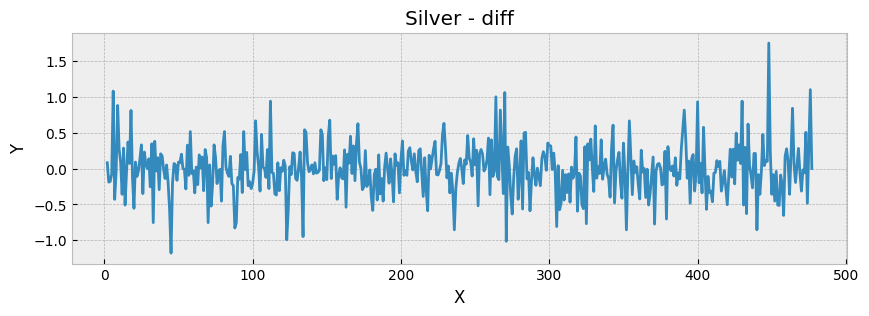

In [35]:
plt.plot(data.index, data);

plt.ylabel("Y")
plt.xlabel("X")
plt.title(name + " - diff")

plt.show()

<h3>Проведем тест Дики Фуллера без включения константы и тренда в регрессию для дифференцированного ряда.</h3>

In [36]:
[t,p,c,r] = ts.adfuller(data, maxlag=maxlag, regression='n', autolag='t-stat', store=True, regresults=False)
print(r.resols.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.512
Model:                            OLS   Adj. R-squared (uncentered):              0.508
Method:                 Least Squares   F-statistic:                              122.9
Date:                Sun, 18 Feb 2024   Prob (F-statistic):                    1.32e-71
Time:                        13:08:53   Log-Likelihood:                         -175.50
No. Observations:                 472   AIC:                                      359.0
Df Residuals:                     468   BIC:                                      375.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

<h3>Примечание! Выше приведены результаты только для модели без включения константы и тренда в регрессию, т.к. остальные также показали значение Р-value больше 0.05.</h3>

<h3>Выведем результаты теста Дики Фуллера</h3>

In [37]:
print(t,p,c)

-9.466939530103636 1.524274881107977e-16 {'1%': -2.570493144750072, '5%': -1.9415838751866215, '10%': -1.6162692291309602}


<h3 style="color:green;">По полученным результатам видно, что значение P-value (вероятность ошибки) значительно меньше 0.05, следовательно мы можем отвергнуть нулевую гипотезу теста Дики Фуллера и делаем вывод, что данный дифференцированный ряд первого порядка стационарен.</h3>